This worksheet is used to check and combine two streams of Met data, 2010-2013 from Anna L and 2014-2016 from Nathan Wales.

*author: Ethan Coon*

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

In [2]:
d1 = h5py.File("Barrow-2010_2013.h5",'r')
d2 = h5py.File("Barrow-2014_2016.h5",'r')

[  4.32000000e+04   1.29600000e+05   2.16000000e+05 ...,   9.06768000e+07
   9.07632000e+07   9.08496000e+07]
[u'air temperature [K]', u'incoming longwave radiation [W m^-2]', u'incoming shortwave radiation [W m^-2]', u'precipitation rain [m s^-1]', u'precipitation snow [m SWE s^-1]', u'relative humidity [-]', u'time [s]', u'wind speed [m s^-1]', u'wind speed reference height [m]']


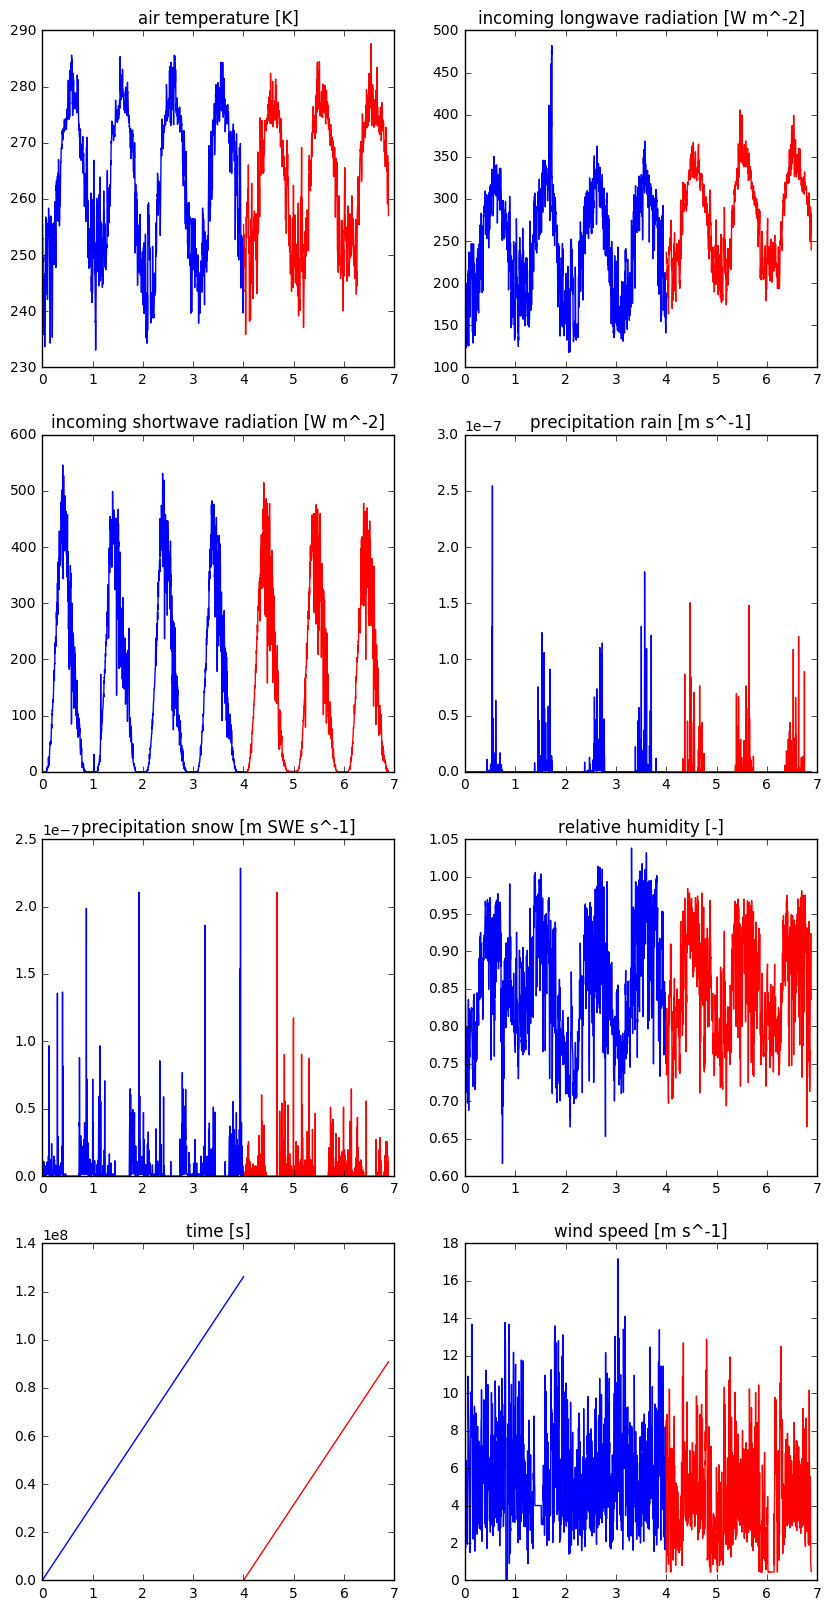

In [3]:
fax = plt.subplots(4,2,figsize=(10,20))
ax = fax[1].ravel()

print d2['time [s]'][:]

print d1.keys()
for i,k in enumerate([k for k in d1.keys() if not "reference height" in k]):
    ax[i].plot(d1['time [s]'][:]/86400.0/365.0, d1[k][:], 'b')
    ax[i].plot(4+(d2['time [s]'][:]/86400.0/365.0), d2[k][:], 'r')
    ax[i].set_title(k)

plt.show()

In [4]:
print "rel hum min = ", d1['relative humidity [-]'][:].min(), d2['relative humidity [-]'][:].min()
print "precip rain min = ", d1['precipitation rain [m s^-1]'][:].min(), d2['precipitation rain [m s^-1]'][:].min()
print "precip snow min = ", d1['precipitation snow [m SWE s^-1]'][:].min(), d2['precipitation snow [m SWE s^-1]'][:].min()
print "qSW min = ", d1['incoming shortwave radiation [W m^-2]'][:].min(), d2['incoming shortwave radiation [W m^-2]'][:].min()  
print "qLW min = ", d1['incoming longwave radiation [W m^-2]'][:].min(), d2['incoming longwave radiation [W m^-2]'][:].min()  
print "wind speed min = ", d1['wind speed [m s^-1]'][:].min(), d2['wind speed [m s^-1]'][:].min()

rel hum min =  0.61693109809 0.666
precip rain min =  0.0 0.0
precip snow min =  0.0 0.0
qSW min =  0.0 0.0
qLW min =  117.758181424 163.6708333
wind speed min =  0.0 0.45


In [6]:
with h5py.File("Barrow-2010_2016.h5",'w') as fid:
    for k in d1.keys():
        if k.startswith("time"):
            fid.create_dataset(k, data=np.concatenate([d1[k][:], 4*365.25*86400 + d2[k][:]]))
        elif k.startswith("wind speed reference height"):
            pass
        else:
            fid.create_dataset(k, data=np.concatenate([d1[k][:], d2[k][:]]))


In [7]:
d3 = h5py.File("Barrow-2010_2016.h5",'r')
print d3['precipitation rain [m s^-1]']

<HDF5 dataset "precipitation rain [m s^-1]": shape (2513,), type "<f8">


In [8]:
d1.close() 
d2.close()
d3.close()